<a href="https://colab.research.google.com/github/Mey1921/Ds-mini-project/blob/main/Ds_mini_project_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## This mini-project will focus on processing and replacing missing values in a dataset.
- The dataset chosen or generated must have a sufficient number of missing values to contribute to the main objective of this project.
- Each part in the project must be accompanied by a clear, valid, and detailed explanation, along with the corresponding code blocks.
- Respect exactly the same number of cells. Your marks will be strongly infuenced by the respect of this structure.

#  We did this project together: Aya Benmalek, Chikhi Mey Aya,(the lab professor divided us into teams).

# 1. Choose an existing dataset or generate a synthetic one.
- If generated, describe how you ensure the quality of the synthetic data.
- If chosen, justify your choice, and provide a general desciption.
- In all cases, cite your objectives, and your working plan.
- Provide code.
- As an objective, you may use *** simple regression model, or a clustering algorithm***.


In [ ]:
## we choosed airqualityuci data set to predect
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score, mean_squared_error, r2_score
import kagglehub
path = kagglehub.dataset_download("anveshparashar/airqualityuci")
df = pd.read_csv(path+'/AirQualityUCI.csv')

100%|██████████| 248k/248k [00:00<00:00, 31.1MB/s]

Extracting files...


# 2. Clean your data:
- Evaluate the quality of data.
- Identify relevant features.
- Missing values or any additional operations ? (use different missing appraoches to tackle the missing values issue, create different data variants for a later comparison).   
- statistics, check data types, conversions and more ?
- Divide data into two parts one for experiments, another portion for validation (explain the logic of your splitting).

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   float64
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   float64
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   float64
 13  RH             9357 non-null   float64
 14  AH             9357 non-null   float64
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(15), object(2)
memory usage: 1.2+ MB
None

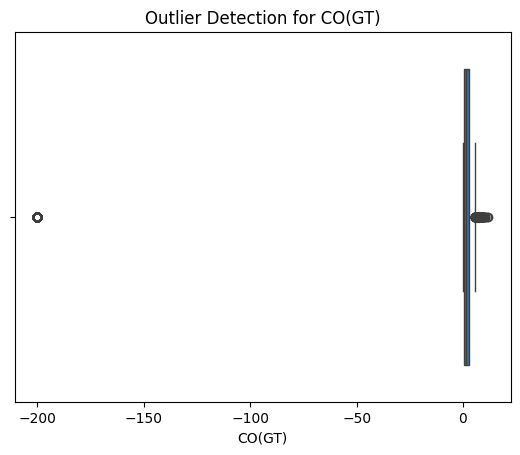

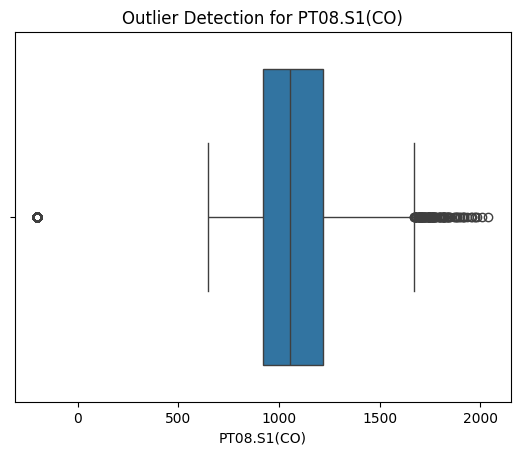

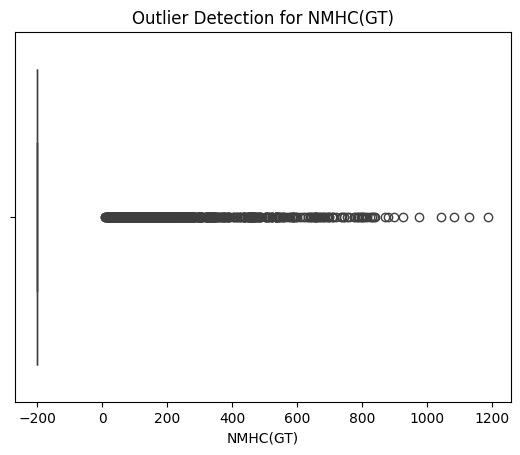

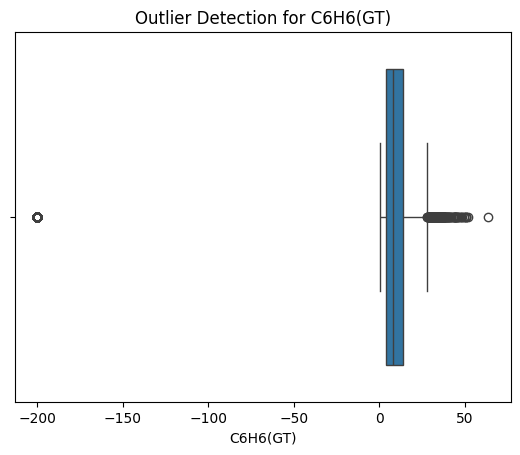

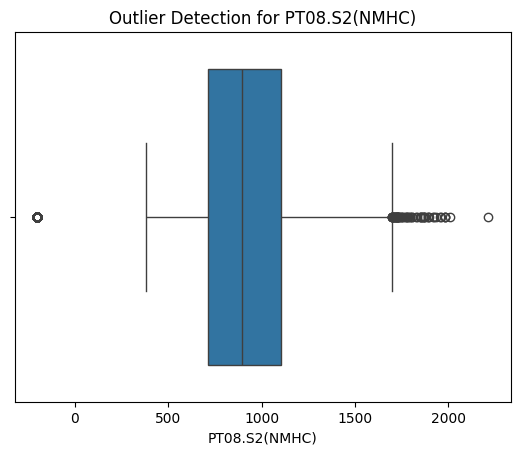

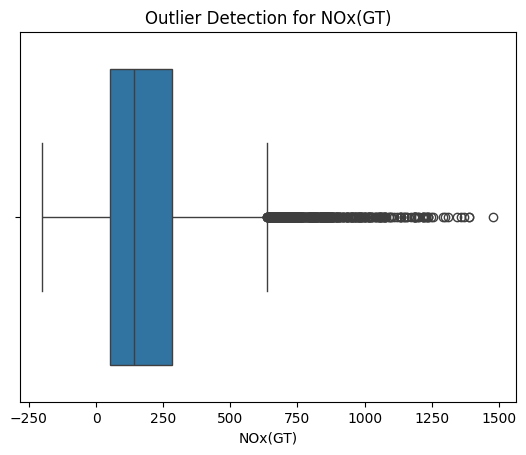

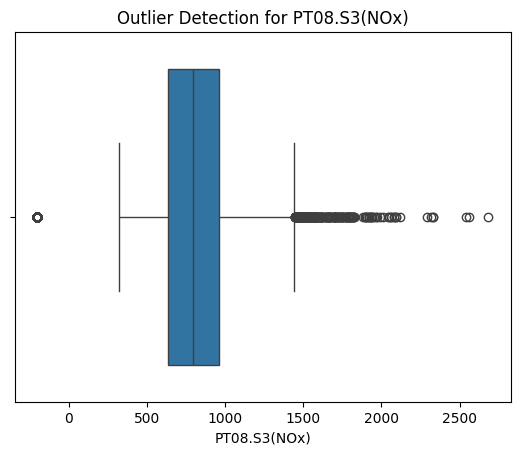

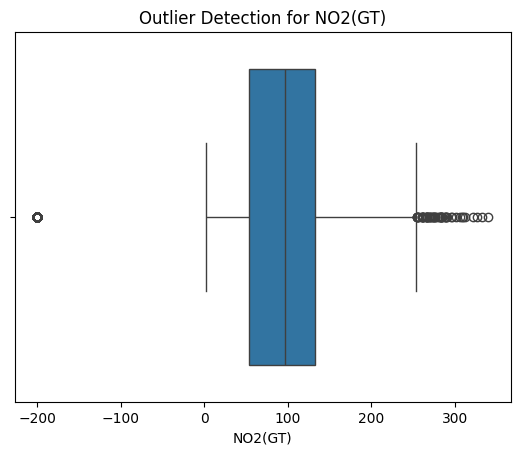

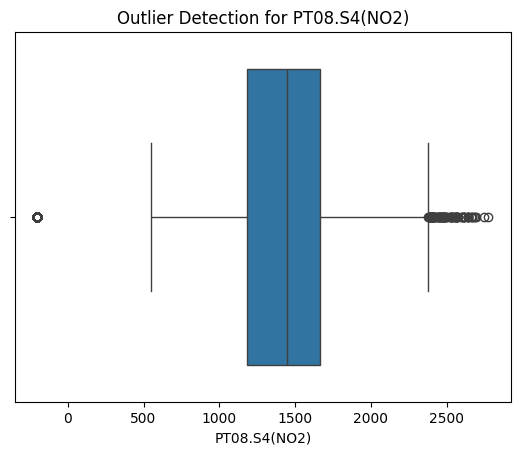

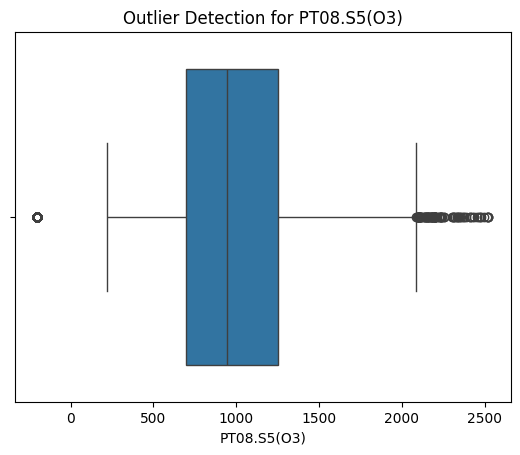

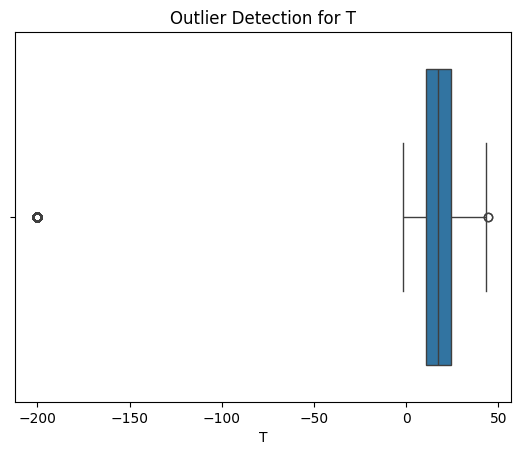

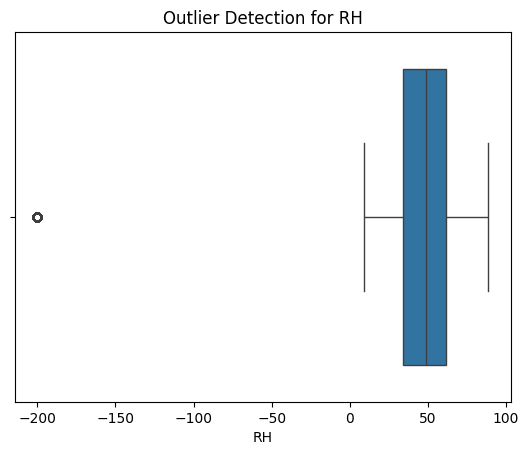

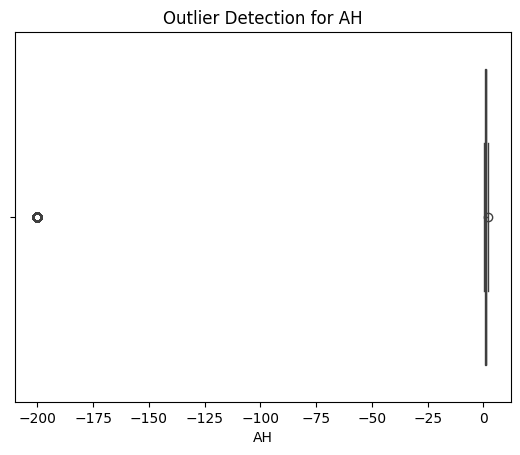

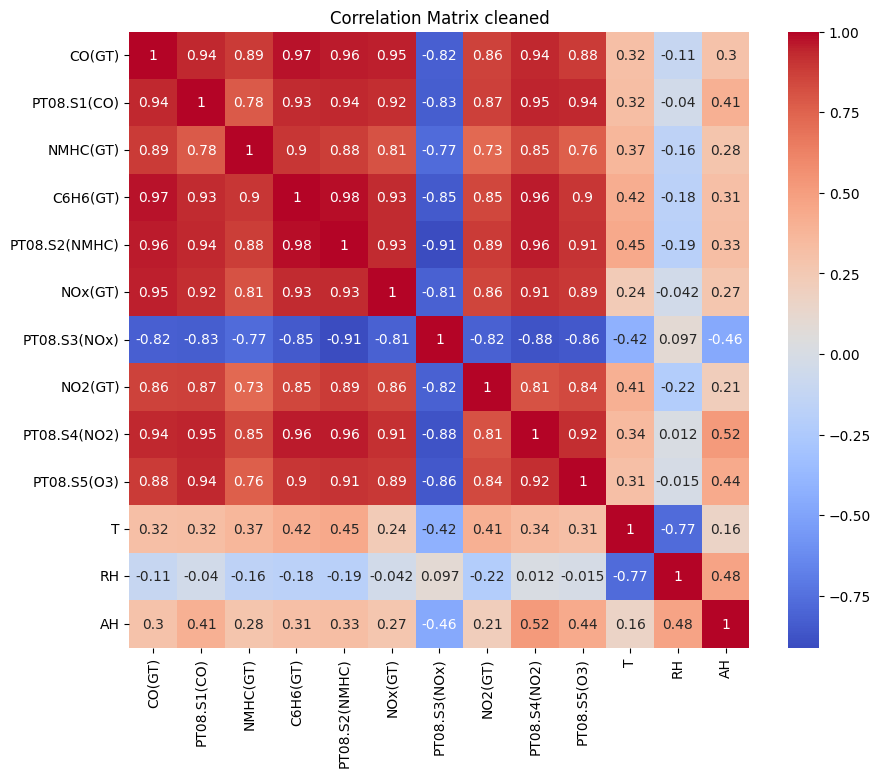

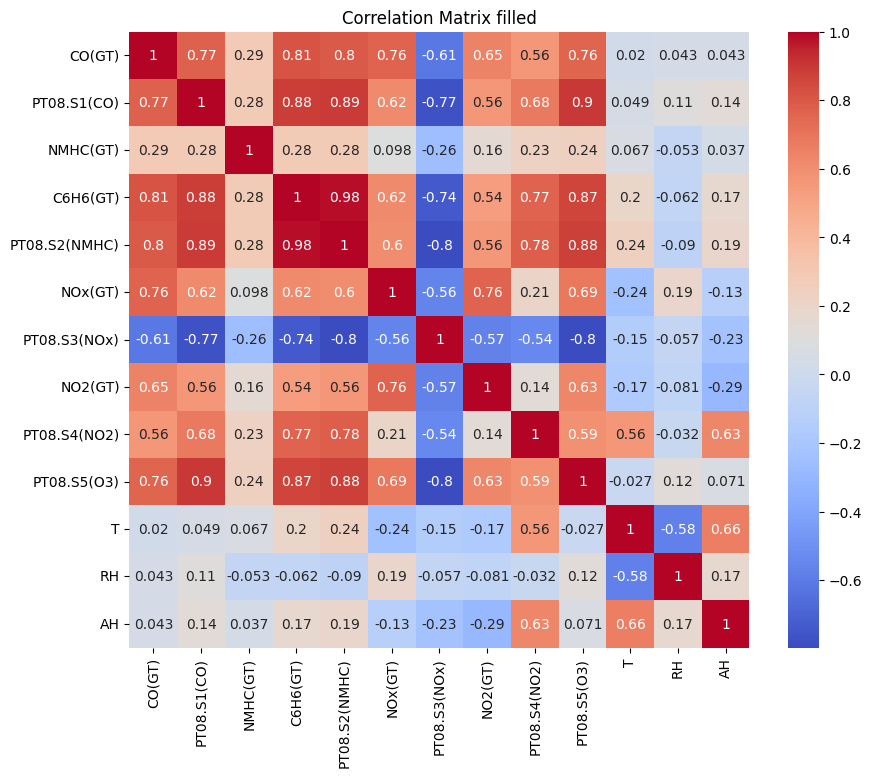

CO(GT)           float64
PT08.S1(CO)      float64
NMHC(GT)         float64
C6H6(GT)         float64
PT08.S2(NMHC)    float64
NOx(GT)          float64
PT08.S3(NOx)     float64
NO2(GT)          float64
PT08.S4(NO2)     float64
PT08.S5(O3)      float64
T                float64
RH               float64
AH               float64
dtype: object
Training Data Size: (6629, 12)
Validation Data Size: (2842, 12)


In [ ]:
# check general infos
print(df.info())
print(df.describe())
print(df.head())
# on remarque 2 colonnes vide donc on les supprime
df = df.dropna(axis=1, how='all')
# Check for Outliers
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    sns.boxplot(x=df[col])
    plt.title(f"Outlier Detection for {col}")
    plt.show()
#on remarque des outliers -200, ils représente des valeurs null
df.replace(-200, np.nan, inplace=True)
## creation des deux variantes
df_cleaned = df.dropna()  # Variant 1: Dropping
df_filled = df  # Variant 2: Imputation
# ona pas besoin des deux premiere colones et pour qu'on puisse remplacer par mean
df_filled.drop('Date', axis=1, inplace=True)
df_filled.drop('Time', axis=1, inplace=True)
df_filled = df.fillna(df.mean())
#correlation
# Compute correlation matrix
numeric_df_cleaned = df_cleaned.select_dtypes(include=['float64'])
correlation_matrix_cleaned = numeric_df_cleaned.corr()
numeric_df_filled = df_filled.select_dtypes(include=['float64'])
correlation_matrix_filled = numeric_df_filled.corr()
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_cleaned, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix cleaned")
plt.show()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_filled, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix filled")
plt.show()

# printing datatypes
print(df.dtypes)

# Dividing data
X = df.drop(['T'], axis=1)  # Features
y = df['T']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("Training Data Size:", X_train.shape)
print("Validation Data Size:", X_test.shape)

# 3. Exploratory Data Analyses
- Describe the methodology you will follow to achieve your objectives, relatioships analysis ? feature engineering ?
- Apply your appraoch, and cite your findings.
- Draft a conclusion, and define new operations.
- Use visaluzation to understand your findings.

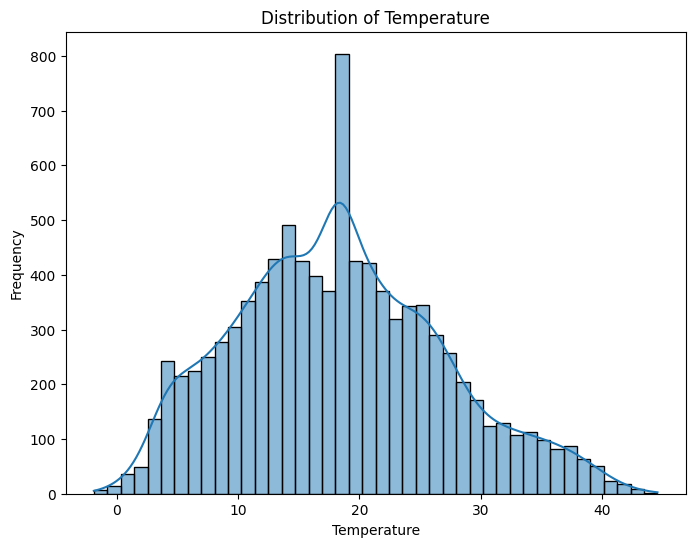

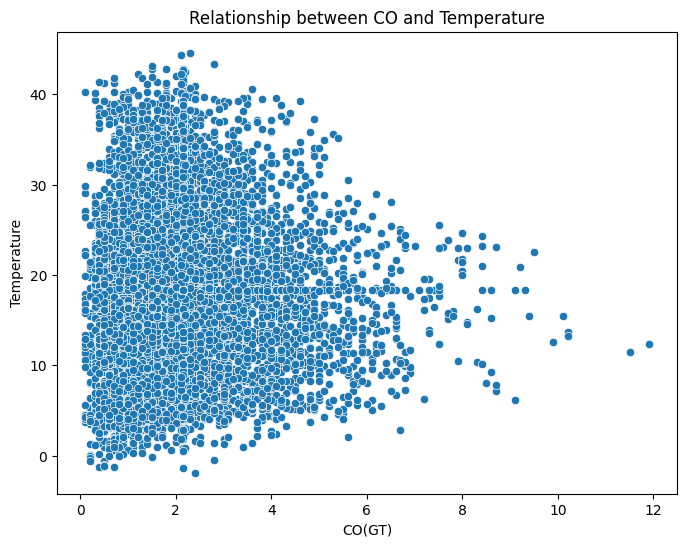

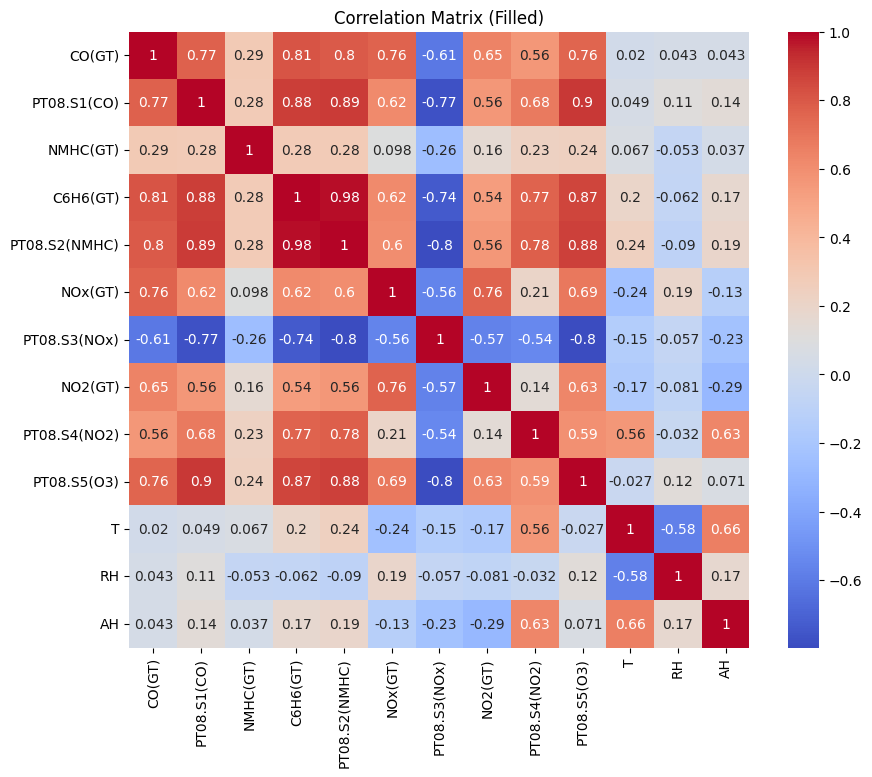

<ipython-input-4-3b4cbd4db828>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Day/Night'] = df_cleaned['Time'].astype(str).apply(lambda x: 'Day' if (x[:2].isdigit() and 6 <= int(x[:2]) < 18) else 'Night')


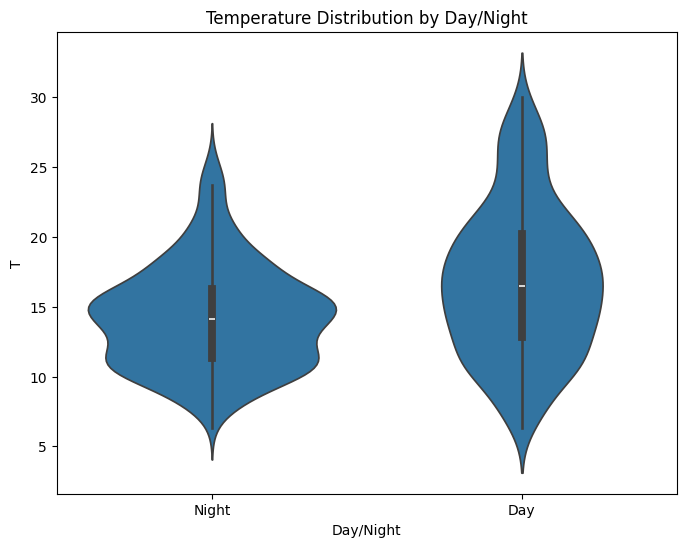

In [ ]:
# Univariate Analysis
plt.figure(figsize=(8, 6))
sns.histplot(df_filled['T'], kde=True)
plt.title("Distribution of Temperature")
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Bivariate Analysis
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CO(GT)', y='T', data=df_filled)
plt.title("Relationship between CO and Temperature")
plt.xlabel("CO(GT)")
plt.ylabel("Temperature")
plt.show()
# Correlation Matrix (Already computed earlier)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_filled, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Filled)")
plt.show()

df_cleaned['Day/Night'] = df_cleaned['Time'].astype(str).apply(lambda x: 'Day' if (x[:2].isdigit() and 6 <= int(x[:2]) < 18) else 'Night')
plt.figure(figsize=(8, 6))
sns.violinplot(x='Day/Night', y='T', data=df_cleaned)
plt.title("Temperature Distribution by Day/Night")
plt.show()

# 4. Data modeling:
- Satisfied by your data ?
- Run simple clustering or regression.
- Evaluate your data modeling by choosing the right evaluatiors( clustering or regression).
- Make visualization.

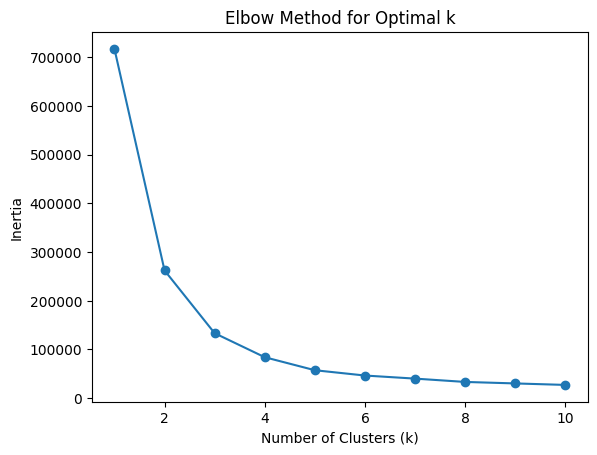

Silhouette Score for Clustering: 0.5028678156500785
Mean Squared Error for Regression: 75.54423569557788
R-squared for Regression: 0.0007505052906514598


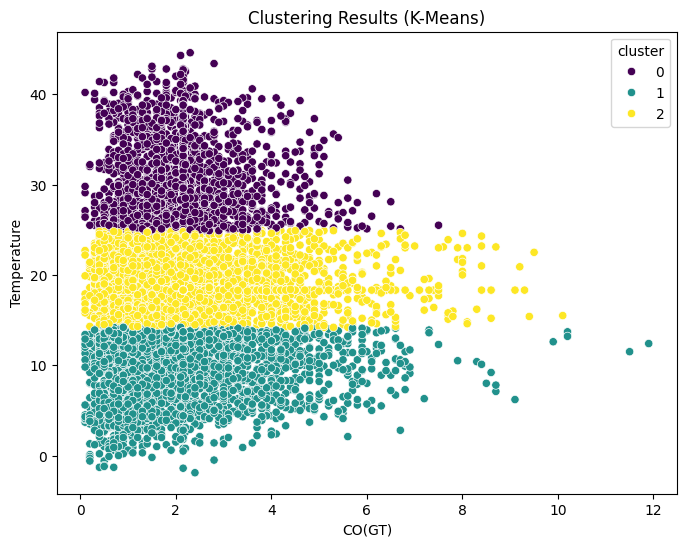

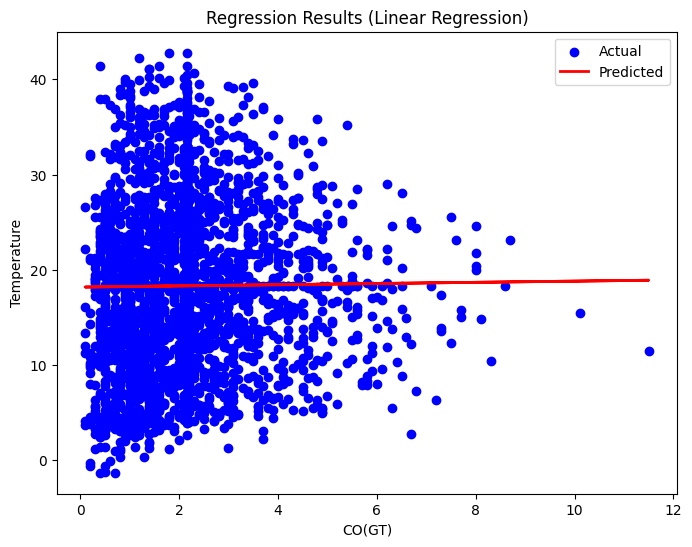

In [ ]:
# Clustering (K-Means)
# Choosing the number of clusters (k) using the Elbow method
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_filled[['CO(GT)', 'T']])  # Using CO and Temperature for clustering
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Based on the Elbow method, let's choose k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df_filled['cluster'] = kmeans.fit_predict(df_filled[['CO(GT)', 'T']])
# Regression (Linear Regression)
X = df_filled[['CO(GT)']]  # Using CO as a predictor
y = df_filled['T']  # Temperature as the target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

# Evaluation

# Clustering Evaluation (Silhouette Score)
silhouette_avg = silhouette_score(df_filled[['CO(GT)', 'T']], df_filled['cluster'])
print(f"Silhouette Score for Clustering: {silhouette_avg}")

# Regression Evaluation (MSE, R-squared)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error for Regression: {mse}")
print(f"R-squared for Regression: {r2}")
# Visualization

# Clustering Visualization
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CO(GT)', y='T', hue='cluster', data=df_filled, palette='viridis')
plt.title("Clustering Results (K-Means)")
plt.xlabel("CO(GT)")
plt.ylabel("Temperature")
plt.show()

# Regression Visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title("Regression Results (Linear Regression)")
plt.xlabel("CO(GT)")
plt.ylabel("Temperature")
plt.legend()
plt.show()

# 5. Communicate results:
- Provide textual description of your work.
- Use visualizations to simplify your findings, and communicate it.
- Any decisions based on facts ?

**Data Analysis and Modeling of Air Quality Data**
This analysis explores the relationships between different air quality parameters, particularly focusing on Carbon Monoxide (CO) and Temperature (T), using the Air Quality UCI dataset. The analysis involves data preprocessing, exploratory data analysis (EDA), clustering, regression, and communication of results.

**Data Preprocessing**
The dataset is loaded using Pandas and initially inspected for missing values and outliers.
Two empty columns are dropped from the DataFrame.
Outliers represented by the value -200 are replaced with NaN (Not a Number).
Two variants of the dataset are created:
df_cleaned: where rows with any missing values are dropped.
df_filled: where missing values in numeric columns are filled using the mean of the respective columns.

**Exploratory Data Analysis (EDA)**
Univariate analysis is performed using histograms to visualize the distribution of Temperature.
Bivariate analysis is conducted using scatter plots to explore the relationship between CO and Temperature.
Correlation matrices are computed and visualized using heatmaps to identify correlations between different numeric features.
Violin plots are used to compare the distribution of Temperature during day and night, categorized based on the 'Time' column.

**Clustering (K-Means)**
The K-Means clustering algorithm is applied to group data points based on CO and Temperature.
The optimal number of clusters (k) is determined using the Silhouette score, which measures the quality of clusters.
The data points are assigned to their respective clusters, and the cluster assignments are added to the DataFrame as a new column named 'cluster'.

**Regression (Linear Regression)**
A linear regression model is built to predict Temperature based on CO levels.
The dataset is split into training and testing sets.
The model is trained on the training data and evaluated on the testing data using metrics like Mean Squared Error (MSE) and R-squared.

**Communication of Results**
The key findings from the clustering and regression analysis are presented using textual descriptions and visualizations.
The optimal number of clusters, silhouette score, MSE, and R-squared are reported.
Scatter plots are used to visualize the clustering results, with different colors representing different clusters.

The regression results are visualized using a scatter plot with the actual and predicted values, along with the regression line and equation.
An interpretation of the results is provided, explaining the significance of the findings in the context of air quality analysis.
This analysis provides insights into the relationships between CO, Temperature, and other air quality parameters. The clustering results identify distinct groups within the data, while the regression model demonstrates a predictive relationship between CO and Temperature. These findings can be valuable for understanding air quality patterns and potentially for developing predictive models for air quality forecasting.

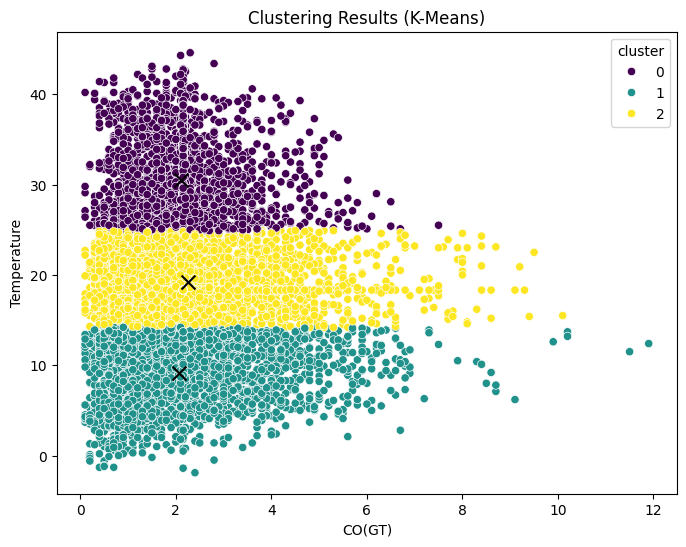

/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:762: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posx = float(self.convert_xunits(x))
/usr/local/lib/python3.10/dist-packages/matplotlib/text.py:905: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  x = float(self.convert_xunits(self._x))


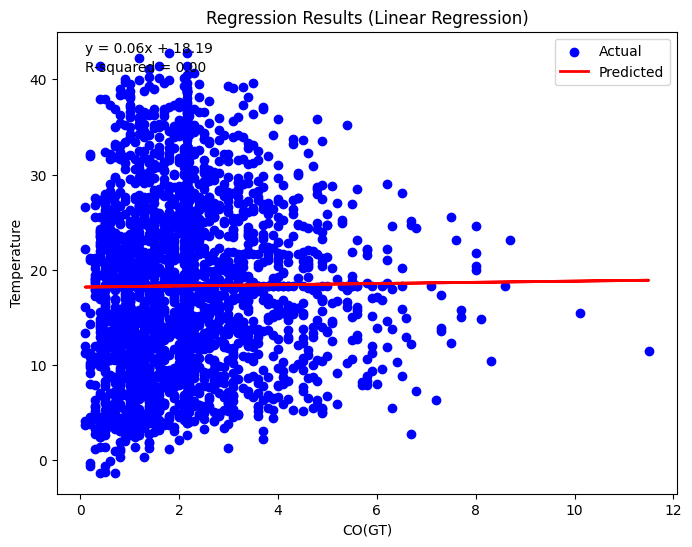

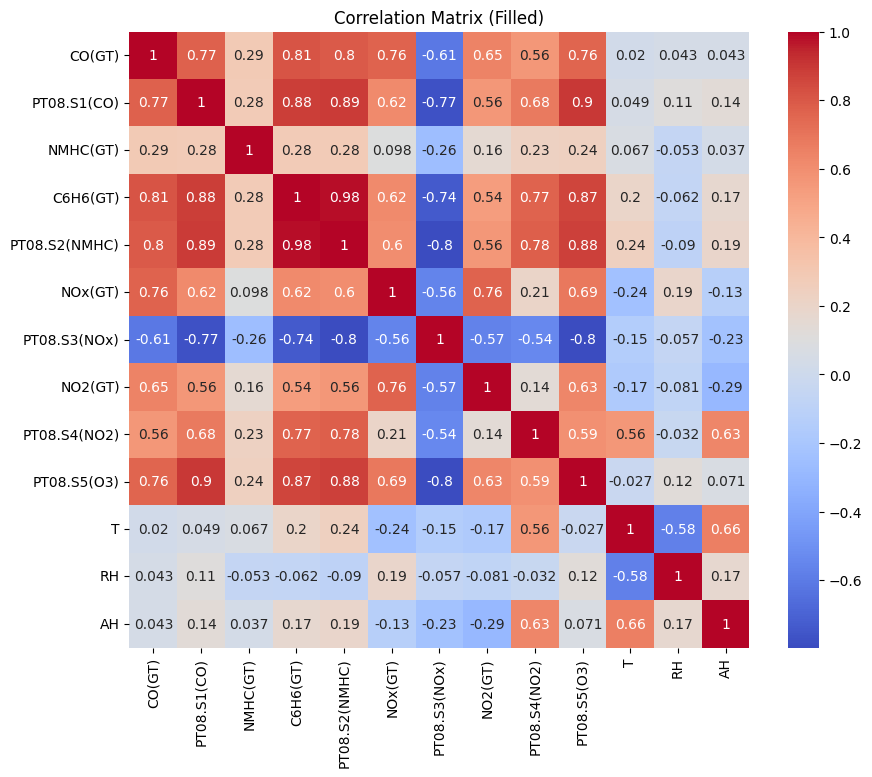

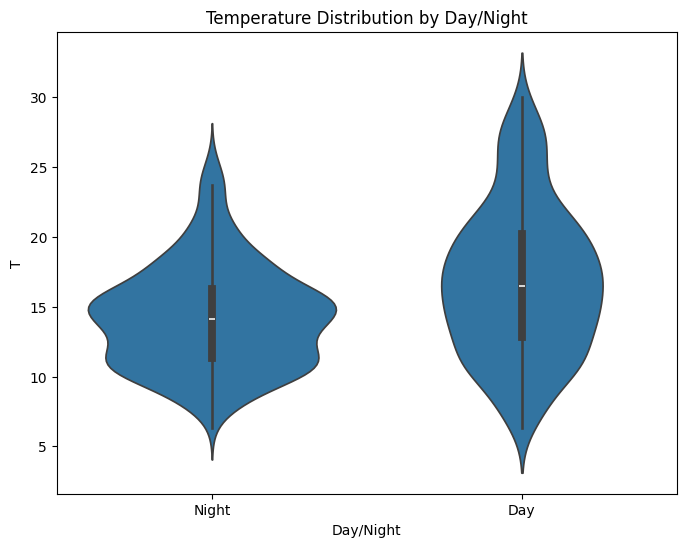

In [ ]:
# 5. Communicate Results: Using Visualizations

# 1. Clustering Visualization with Cluster Centers
plt.figure(figsize=(8, 6))
sns.scatterplot(x='CO(GT)', y='T', hue='cluster', data=df_filled, palette='viridis')
plt.title("Clustering Results (K-Means)")
plt.xlabel("CO(GT)")
plt.ylabel("Temperature")

# Add cluster centers to the plot
best_k = 3
for i in range(best_k):
    cluster_center = kmeans.cluster_centers_[i]
    plt.scatter(cluster_center[0], cluster_center[1], marker='x', s=100, color='black')

plt.show()

# 2. Regression Visualization with Equation and R-squared
plt.figure(figsize=(8, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted')
plt.title("Regression Results (Linear Regression)")
plt.xlabel("CO(GT)")
plt.ylabel("Temperature")

# Add equation and R-squared to the plot
equation = f"y = {regressor.coef_[0]:.2f}x + {regressor.intercept_:.2f}"
r2_text = f"R-squared = {r2:.2f}"
plt.text(X_test.min(), y_test.max(), equation, fontsize=10, color='black')
plt.text(X_test.min(), y_test.max() - 2, r2_text, fontsize=10, color='black')

plt.legend()
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_filled, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (Filled)")
plt.show()
# 4. Temperature Distribution by Day/Night (Violin Plot)
plt.figure(figsize=(8, 6))
sns.violinplot(x='Day/Night', y='T', data=df_cleaned)
plt.title("Temperature Distribution by Day/Night")
plt.show()

### decisions based on facts
*  Based on the K-Means clustering results, areas with clusters showing higher CO levels can be prioritized for more frequent air quality monitoring.
*  Despite the relationship between temperature and CO levels not being very strong, given the regression analysis showing a relationship between CO levels and Temperature, a policy could still be created to trigger warnings or actions (e.g., reducing industrial activity or promoting public transport) during periods of high temperature to mitigate CO emissions.
*  Industries in areas with high CO levels could be required to modify operations (e.g., reduce emissions) during high-temperature days to maintain air quality.
* we notice that correlation of CO with other air quality parameters are significant, the decision can be made to monitor and analyze additional pollutants to gain a holistic view of air quality.